<a href="https://colab.research.google.com/github/TruongScotl/LapTrinhPhanTichDuLieu/blob/main/Laptrinhphantichdulieu_p4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dữ liệu có quá nhiều biến -> ??

*   Target = f(input)
*   input -> có qúa nhiều(vài trăm cột)
*   PCA (feature extraction) ->các cột trong PCA tương ứng với cột nào trong dữ liệu ban đầu ?
*   Giải thích với khách hàng ?
*   CarT -> feature selection -> đo biến có ảnh hưởng mạnh đến target --> decision tree
*   Dự bao điểm thi DH1 ( với các biến input định lượng -> 48 biến (T1 ->) -> biến nào có tầm ảnh hưởng quan hệ với biến DH1



In [1]:
import pandas as pd 
df = pd.read_csv("/content/dulieuxettuyendaihoc.csv", header = 0, delimiter = ',')
df.head(5)

,STT,T1,L1,H1,S1,V1,X1,D1,N1,T2,L2,H2,S2,V2,X2,D2,N2,T3,L3,H3,S3,V3,X3,D3,N3,T4,L4,H4,S4,V4,X4,D4,N4,T5,L5,H5,S5,V5,X5,D5,N5,T6,L6,H6,S6,V6,X6,D6,N6,GT,DT,KV,DH1,DH2,DH3,KT
0,1,7.2,7.3,6.3,7.3,7.0,7.9,7.3,5.5,8.4,8.9,5.8,9.0,6.6,8.7,7.2,5.8,7.4,7.4,5.2,6.6,6.9,8.9,8.1,5.8,7.2,7.1,5.9,7.2,6.6,5.8,8.1,5.9,7.4,5.6,6.1,5.7,7.9,5.0,7.4,5.0,6.9,5.7,6.5,7.2,8.4,6.6,7.6,5.9,F,NaN,2NT,3.25,3.25,4.50,A1
1,2,5.4,3.9,3.9,4.0,5.4,5.4,5.3,2.8,6.3,5.4,3.2,7.2,5.4,6.1,4.7,4.7,4.3,3.8,3.7,3.7,5.2,6.6,5.8,4.4,4.9,2.8,5.1,4.5,5.6,7.0,7.6,4.7,3.0,4.6,4.4,4.9,4.3,6.3,6.7,4.4,4.0,5.4,4.0,5.2,5.5,6.6,6.1,4.4,M,NaN,1,6.00,4.00,3.50,C
2,3,5.6,6.8,7.2,7.5,4.3,7.4,5.8,3.2,5.0,4.9,6.2,6.1,5.3,7.1,4.0,4.9,2.8,6.3,6.2,5.6,2.5,5.8,5.1,3.7,6.1,6.1,5.8,6.8,4.0,6.4,5.3,4.1,4.8,5.1,6.4,5.1,4.0,6.9,3.9,3.2,5.7,6.6,6.8,6.8,4.1,7.9,8.1,4.6,M,NaN,1,5.00,6.75,4.00,C
3,4,6.6,6.4,5.3,6.9,5.4,7.3,6.4,5.8,5.1,6.2,5.5,5.5,4.4,6.5,4.9,4.4,5.9,7.3,5.9,4.9,5.7,6.8,6.8,5.4,4.1,4.4,4.1,7.3,5.3,7.1,7.3,5.6,6.1,4.9,5.3,4.0,6.2,5.5,5.9,6.5,7.4,5.6,6.6,6.8,6.6,7.1,7.3,7.4,M,NaN,1,4.25,4.25,5.25,D1
4,5,6.0,5.0,6.0,7.3,6.5,7.7,7.9,6.1,5.4,5.5,5.9,7.5,6.5,6.9,7.6,6.4,7.6,7.6,6.7,6.6,5.7,7.9,7.4,7.3,4.4,6.5,5.6,8.3,6.2,4.9,8.6,7.7,6.8,5.4,4.7,5.0,5.1,7.0,7.0,6.3,8.0,6.2,6.8,6.9,6.6,6.1,7.5,7.2,M,NaN,2NT,4.25,4.50,5.00,A


In [2]:
X = df.loc[:, 'T1': 'N6']
y = df.DH1

In [5]:
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split

# train test split 

from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(X,y)

In [10]:
import numpy as np
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file ='/content/mytree.dot',
                feature_names= X.columns, impurity = False,
                filled = True)

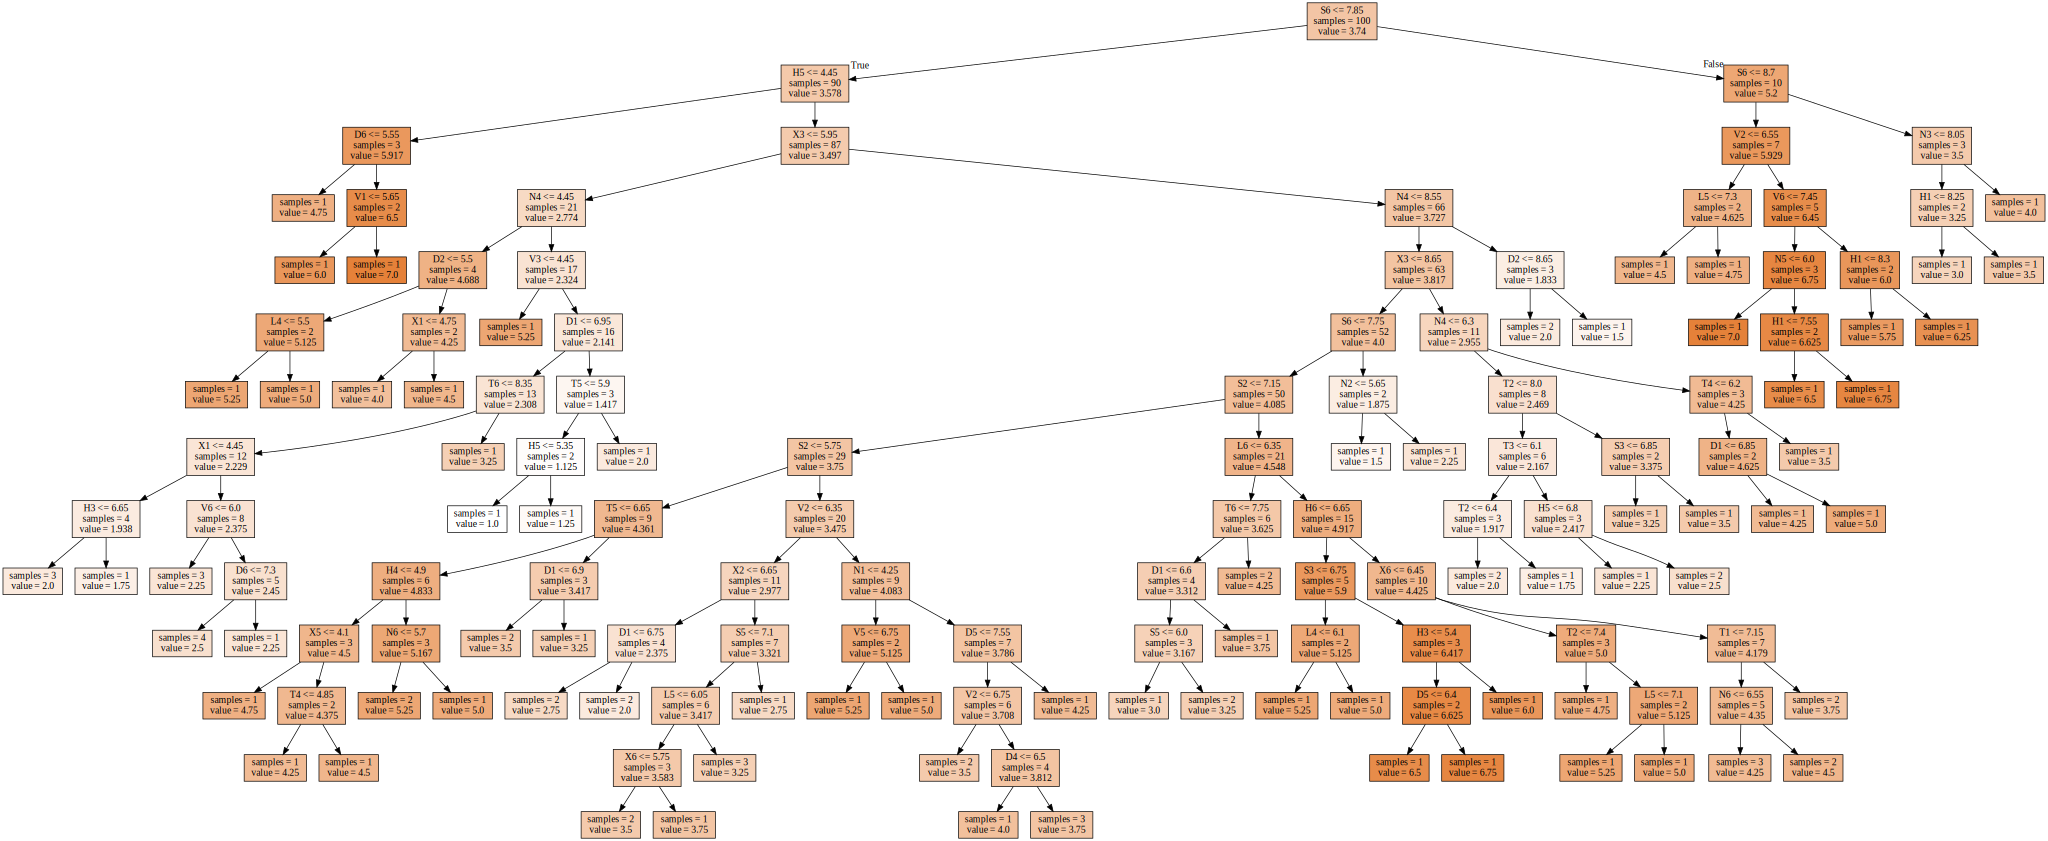

In [12]:
import graphviz
from IPython.display import display
with open('/content/mytree.dot') as f:
  dot_graph = f.read()

display(graphviz.Source(dot_graph))

Phải biết cách chọn chiều sâu tối ưu

(-1.0, 48.0)

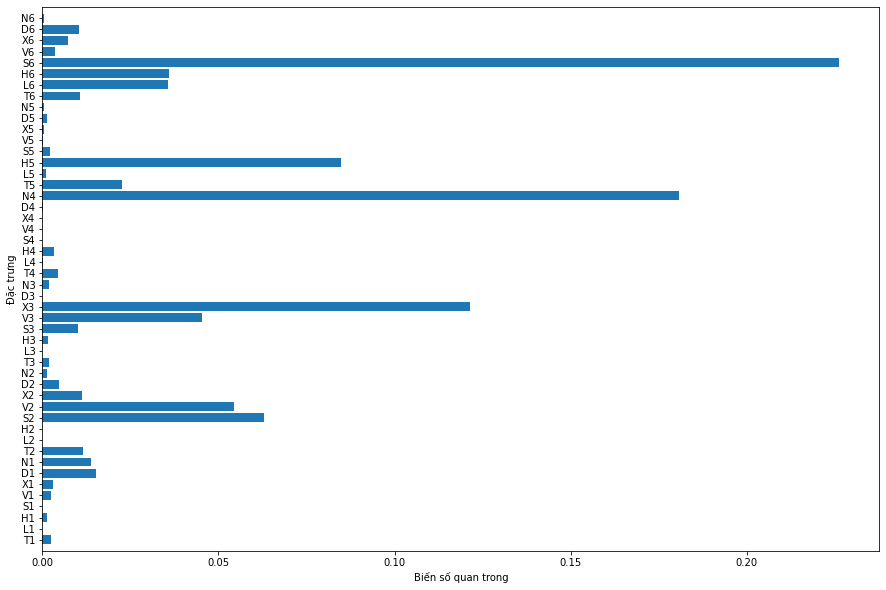

In [19]:
# Trực quan biến số quan trọng với DH1
import matplotlib.pyplot as plt

n_features = X.shape[1]
plt.figure(figsize = (15,10))
plt.barh(range(n_features), tree.feature_importances_, align ='center')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel("Biến số quan trong")
plt.ylabel("Đặc trưng")
plt.ylim(-1, n_features)

Dựa vào bảng trên nhận thấy rằng cột nào càng cao thì độ ảnh hưởng càng lớn và nên chọn cột đó. Ví dụ như là [S6, H5, N4, X3, H2]
